In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

from sklearn.datasets import make_blobs

import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [3]:
data = np.load("../datasets/mnist/mnist_train_small.npy")

In [4]:
X, y = data[:, 1:], data[:, 0]

In [5]:
y_hot = OneHotEncoder().fit_transform(y.reshape(-1, 1)).todense()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [10]:
in_layer = Input(shape=(784,))
d1 = Dense(400, activation="sigmoid", name="l1")(in_layer)
d2 = Dense(200, activation="sigmoid", name="l2")(d1)
d3 = Dense(100, activation="sigmoid", name="l3")(d2)
d4 = Dense(50, activation="sigmoid", name="l4")(d3)
out_layer = Dense(10, activation="softmax", name="l5")(d4)

model = Model(inputs=in_layer, outputs=out_layer)

In [20]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
l1 (Dense)                   (None, 400)               314000    
_________________________________________________________________
l2 (Dense)                   (None, 200)               80200     
_________________________________________________________________
l3 (Dense)                   (None, 100)               20100     
_________________________________________________________________
l4 (Dense)                   (None, 50)                5050      
_________________________________________________________________
l5 (Dense)                   (None, 10)                510       
Total params: 419,860
Trainable params: 419,860
Non-trainable params: 0
_____________________________________________________

In [21]:
model.compile(optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"])

In [22]:
y_train[0].shape

(1, 10)

In [3]:
outcome = model.fit(X_train, y_train, epochs=10)

NameError: name 'model' is not defined

In [14]:
model.evaluate(X_test, y_test, verbose=0)

[0.2767162302136421, 0.9139394]

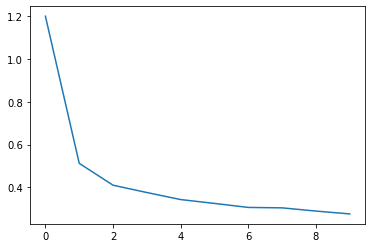

In [15]:
plt.plot(outcome.history["loss"])

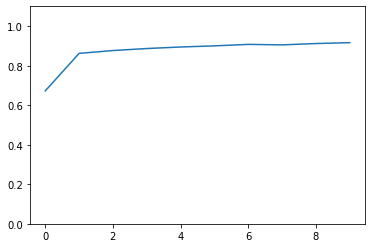

In [16]:
plt.figure()
plt.plot(outcome.history["accuracy"])
plt.ylim(0, 1.1)
plt.show()

In [18]:
model.predict(X_test[:10]).argmax(axis=1)

array([7, 7, 0, 9, 4, 5, 4, 6, 9, 2])

In [20]:
y_test[:10].argmax(axis=1)

matrix([[7],
        [7],
        [0],
        [9],
        [4],
        [5],
        [4],
        [6],
        [9],
        [2]])

In [21]:
from PIL import Image

array([[4, 9, 6, 0, 7, 5, 8, 1, 2, 3]])

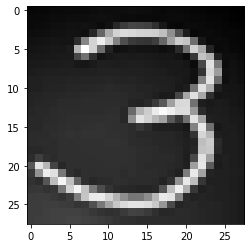

In [56]:
one = Image.open("../datasets/nums/three.jpeg")

small = one.resize(size=(28, 28))

img = 255 - np.array(small).mean(axis=2)

plt.imshow(img, cmap="gray")

model.predict(np.array([img.flatten()])).argsort(axis=1)